<a href="https://colab.research.google.com/github/hasankanaan26/DataScienceFoundationsFiles/blob/main/Week_8_Challenge_Machine_Translation_(ENG_FR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Translation Using a Seq2Seq Architecture

---
The goal of this colab is to get you more familiar with the Seq2Seq models and their challenges. For this reason, you will be working on machine translation problem where we would have a sentence as input (in english), and the output is gonna be the translated sentence (in french). So just like what happens with Google Translate.


**Just to give you a heads up:** We won't be having a model performing like Google translate, but at least we will have an idea about how Google Translate works and the challenges that exist with a translation problem.  

## Importing Libraries

We start by importing numpy and pandas and then we can add the rest

In [ ]:
import pandas as pd
import numpy as np

We clone the github repository where our data exists. Here is the github link: https://github.com/zaka-ai/machine_learning_certification/tree/main/Challenge%207 

## Getting the data

In [ ]:
#Test Your Zaka
!git clone https://github.com/zaka-ai/machine_learning_certification.git

Cloning into 'machine_learning_certification'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 43 (delta 10), reused 10 (delta 1), pack-reused 0
Unpacking objects: 100% (43/43), done.


We read the english sentences in a dataframe named "english", and the french sentences in a dataframe named "french"

In [ ]:
#Test Your Zaka (English)
path_en='/content/machine_learning_certification/Challenge 7/en.csv'
english=pd.read_csv(path_en, header=None)
english.columns=['en_sentence']

In [ ]:
#Test Your Zaka (French)
path_fr='/content/machine_learning_certification/Challenge 7/fr.csv'
french=pd.read_csv(path_fr, header=None)
french.columns=['fr_sentence']

**How many sentences does each of the files contain?**

In [ ]:
#Test Your Zaka
print('english file contains',english.shape[0],'sentences')
print('french file contains',french.shape[0],'sentences')

english file contains 137860 sentences
french file contains 137860 sentences


Now let us concatenate the 2 dataframes into one dataframe that we call **df** where one column has the english senetnces and the other has the french sentences

In [ ]:
#Test Your Zaka
df=pd.concat([english,french],axis=1)

In [ ]:
df.head(10)

,en_sentence,fr_sentence
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."
5,"his favorite fruit is the orange , but my favo...","son fruit préféré est l'orange , mais mon préf..."
6,"paris is relaxing during december , but it is ...","paris est relaxant en décembre , mais il est g..."
7,"new jersey is busy during spring , and it is n...","new jersey est occupé au printemps , et il est..."
8,"our least liked fruit is the lemon , but my le...","notre fruit est moins aimé le citron , mais mo..."
9,the united states is sometimes busy during jan...,"les états-unis est parfois occupé en janvier ,..."


Let's name the columns as **English** and **French** so that we access them easier.

In [ ]:
#Test Your Zaka
df.columns=['English','French']
df.head()

,English,French
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."


Pick a sentence and print it in both languages

In [ ]:
#Test Your Zaka
df.loc[[2]]

,English,French
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."


##Cleaning Data

The data that we have is almost clean as we can see, we just need to remove the punctuations inside of it.

In [ ]:
df['English']=df['English'].str.replace(r'[^\w\s]+', '')
df['French']=df['French'].str.replace(r'[^\w\s]+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


Make sure that the punctuation is removed by printing the example that you printed earlier.

In [ ]:
df.loc[[2]]

,English,French
2,california is usually quiet during march and ...,california est généralement calme en mars et ...


##Exploring the Data

Add a column **ENG Length** to the dataset that shows how many words does a sentence contain, and do the same for french in a column called **FR Length**

In [ ]:
df['ENG Length'] = df['English'].str.split().apply(len)

In [ ]:
df['FR Length'] = df['French'].str.split().apply(len)

In [ ]:
df.head()

,English,French,ENG Length,FR Length
0,new jersey is sometimes quiet during autumn a...,new jersey est parfois calme pendant l automne...,13,14
1,the united states is usually chilly during jul...,les étatsunis est généralement froid en juille...,15,13
2,california is usually quiet during march and ...,california est généralement calme en mars et ...,13,13
3,the united states is sometimes mild during jun...,les étatsunis est parfois légère en juin et i...,14,13
4,your least liked fruit is the grape but my le...,votre moins aimé fruit est le raisin mais mon...,14,14


Visualize the distribution of the lengths of english sentences and french sentences.

(array([  283.,  2592., 26375.,  5122.,  1031.,   980.,  3535., 27009.,
        34913., 36020.]),
 array([ 3. ,  4.2,  5.4,  6.6,  7.8,  9. , 10.2, 11.4, 12.6, 13.8, 15. ]),
 <a list of 10 Patch objects>)

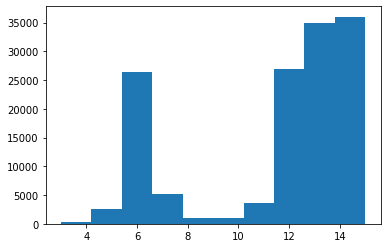

In [ ]:
#Test Your Zaka
import matplotlib.pyplot as plt
plt.hist(df['ENG Length'])

(array([3.5000e+01, 7.9300e+02, 1.0436e+04, 1.9905e+04, 8.2750e+03,
        3.5887e+04, 5.3255e+04, 8.9480e+03, 3.2300e+02, 3.0000e+00]),
 array([ 2. ,  3.9,  5.8,  7.7,  9.6, 11.5, 13.4, 15.3, 17.2, 19.1, 21. ]),
 <a list of 10 Patch objects>)

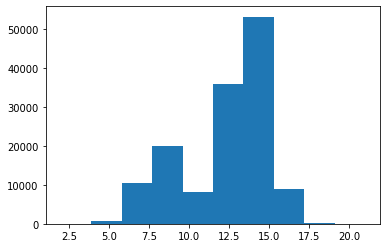

In [ ]:
#Test Your Zaka
import matplotlib.pyplot as plt
plt.hist(df['FR Length'])

Get the maximum length of an english sentence and the maximum length of a french sentence. 

In [ ]:
#Test Your Zaka
print('max length of an english sentence:',max(df['ENG Length']))
print('max length of a french sentence:',max(df['FR Length']))

max length of an english sentence: 15
max length of a french sentence: 21


##Preprocessing the Data

In order for the data to be fed to the model, it has to be tokenized and padded. 

####Tokenization

**To tokenize english and french sentences, we can use only one tokenizer. True or False?**

*False, each should have different tokenizer*

Tokenize the sentences that we have.

In [ ]:
#Test Your Zaka
from tensorflow.keras.preprocessing.text import Tokenizer

#adding <START>  and <END> to the end of the output sentences, the current problem is that the enclosing characters are being removed from the tokens <START> is becoming start
df['French']  = df['French'].apply(lambda x: '<START> ' +  x + ' <END>')

engTokenizer = Tokenizer()
engTokenizer.fit_on_texts(df['English'])

frTokenizer=Tokenizer()
frTokenizer.fit_on_texts(df['French'])

**How many unique words do we have in english and in french?**

In [ ]:
numberOfEnglishTokens=len(engTokenizer.word_index)
numberOfFrenchTokens=len(frTokenizer.word_index)

print('number of unique english words:',numberOfEnglishTokens)
print('number of unique french words:',numberOfFrenchTokens-2)

number of unique english words: 199
number of unique french words: 344


####Padding

**What should be the length of the sequences that we have after padding?**

*they should be 15 for english which is the maximum length of sentences in English, and 21 for French*

Perform padding on the sequences that we have.

In [ ]:
#Test Your Zaka
from tensorflow.keras.preprocessing.sequence import pad_sequences

#list of representations of the sentences as a sequence of indices
english_tokens=engTokenizer.texts_to_sequences(df['English'])
#list of representations of the sentences as a sequence of indices
french_tokens=frTokenizer.texts_to_sequences(df['French'])

english_pad=pad_sequences(english_tokens, maxlen=15, padding='post')
french_pad=pad_sequences(french_tokens, maxlen=21, padding='post')

##Modeling

After preprrocessing the data, we can build our model. Start by building a baseline architecture relying on one directional RNNs, LSTMs, or GRUs. It will be good to lookup how to build Seq2Seq models, there are some new layers that will help you like RepeatVector and TimeDistributed.

In [ ]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense,TimeDistributed,Bidirectional

HIDDEN_DIM = 256

encoder_inputs = Input(shape=(None, numberOfEnglishTokens))
encoder_LSTM = LSTM(units=HIDDEN_DIM, return_state=True) 
encoder_outputs, state_h, state_c = encoder_LSTM(encoder_inputs) # encoderの出力は無視する、memory cellの状態だけ保存
encoder_states = [state_h, state_c]

decoder_inputs = Input(shape=(None, numberOfFrenchTokens))
decoder_LSTM = LSTM(units=HIDDEN_DIM, return_sequences=True, return_state=True)
decoder_outputs, _h, _c = decoder_LSTM(decoder_inputs, initial_state=encoder_states)
decoder_outputs = TimeDistributed(Dense(numberOfFrenchTokens, activation='softmax'))(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, 199)]  0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None, 346)]  0           []                               
                                                                                                  
 lstm (LSTM)                    [(None, 256),        466944      ['input_1[0][0]']                
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                              

Compile and train the model. 
**FYI:** While specifying the architecture of your model and the number of epochs for training, keeep in your mind that your model might take A LOT of time to train.

In [ ]:
import re

#we shouldn't hardcode the numbers 
max_encoder_seq_length = 15
#here I added 2 because of <START> and <END>
max_decoder_seq_length = 23

#sorting the dictionary keys in the format {"token" , id} alphabatically => this returns a list of sorted strinfs (we no longer have a dictionary)
input_tokens = sorted(engTokenizer.word_index.keys(), key=lambda x:x.lower())

#sorting the dictionary keys in the format {"token" , id} alphabatically
target_tokens = sorted(frTokenizer.word_index.keys(), key=lambda x:x.lower())

#traversing or looping over the tokens and assigning an index chronologically
input_features_dict = dict(
    [(token, i) for i, token in enumerate(input_tokens)])

target_features_dict = dict(
    [(token, i) for i, token in enumerate(target_tokens)])

reverse_input_features_dict = dict(
    (i, token) for token, i in input_features_dict.items())

reverse_target_features_dict = dict(
    (i, token) for token, i in target_features_dict.items())

#fixing the dictionary keys because keras removed <>
target_features_dict['<start>'] = target_features_dict.pop('start')
target_features_dict['<end>'] = target_features_dict.pop('end')


encoder_input_data = np.zeros(
(len(df['English']), max_encoder_seq_length, numberOfEnglishTokens), dtype='float32')
decoder_input_data = np.zeros(
(len(df['English']), max_decoder_seq_length, numberOfFrenchTokens),
dtype='float32')
decoder_target_data = np.zeros(
(len(df['English']), max_decoder_seq_length, numberOfFrenchTokens), dtype='float32')

#traversing the list of sentences and one-hot incoding them
#df['English'] is our list of english input sentences, df['French'] is our list of french output sentences
for line, (input_doc, target_doc) in enumerate(zip(df['English'], df['French'])):
  for timestep, token in enumerate(input_doc.lower().split()):
    #Assign 1. for the current line, timestep, & word in encoder_input_data
    encoder_input_data[line, timestep, input_features_dict[token]] = 1.
  for timestep, token in enumerate(target_doc.lower().split()):
    decoder_input_data[line, timestep, target_features_dict[token]] = 1.
    if timestep > 0:
      decoder_target_data[line, timestep - 1, target_features_dict[token]] = 1.


In [24]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics= ['accuracy'])

BATCH_SIZE = 256
EPOCHS = 8
model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.2)

Epoch 1/8
431/431 [==============================] - 389s 893ms/step - loss: 1.2633 - accuracy: 0.2528 - val_loss: 0.6780 - val_accuracy: 0.3523
Epoch 2/8
431/431 [==============================] - 380s 883ms/step - loss: 0.5716 - accuracy: 0.3800 - val_loss: 0.5151 - val_accuracy: 0.3959
Epoch 3/8
431/431 [==============================] - 382s 887ms/step - loss: 0.4523 - accuracy: 0.4216 - val_loss: 0.3740 - val_accuracy: 0.4526
Epoch 4/8
431/431 [==============================] - 380s 881ms/step - loss: 0.3133 - accuracy: 0.4774 - val_loss: 0.2404 - val_accuracy: 0.5023
Epoch 5/8
431/431 [==============================] - 374s 869ms/step - loss: 0.1709 - accuracy: 0.5262 - val_loss: 0.1019 - val_accuracy: 0.5489
Epoch 6/8
431/431 [==============================] - 376s 873ms/step - loss: 0.0674 - accuracy: 0.5604 - val_loss: 0.0442 - val_accuracy: 0.5669
Epoch 7/8
431/431 [==============================] - 376s 872ms/step - loss: 0.0383 - accuracy: 0.5691 - val_loss: 0.0309 - val_ac

Define a function that gets an input sentence in english and gives the output sentence in the french language.

In [25]:
from keras.models import load_model
model.save("model1", save_format='h5')
training_model = load_model('model1')
encoder_inputs = training_model.input[0]
encoder_outputs, state_h_enc, state_c_enc = training_model.layers[2].output
encoder_states = [state_h_enc, state_c_enc]
encoder_model = Model(encoder_inputs, encoder_states)

latent_dim = 256
decoder_state_input_hidden = Input(shape=(latent_dim,))
decoder_state_input_cell = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_hidden, decoder_state_input_cell]

decoder_outputs, state_hidden, state_cell = decoder_LSTM(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_hidden, state_cell]
# decoder_outputs = decoder_dense(decoder_outputs)

decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

#the function
def decode_response(test_input):
    #Getting the output states to pass into the decoder
    states_value = encoder_model.predict(test_input)
    #Generating empty target sequence of length 1
    target_seq = np.zeros((1, 1, numberOfFrenchTokens))
    #Setting the first token of target sequence with the start token

    target_seq[0, 0, target_features_dict['<start>']] = 1.
    
    #A variable to store our response word by word
    decoded_sentence = ''
    
    stop_condition = False
    while not stop_condition:
      #Predicting output tokens with probabilities and states
      output_tokens, hidden_state, cell_state = decoder_model.predict([target_seq] + states_value)
      #Choosing the one with highest probability
      sampled_token_index = np.argmax(output_tokens[0, -1, :])
      sampled_token = reverse_target_features_dict[sampled_token_index]
      decoded_sentence += " " + sampled_token#Stop if hit max length or found the stop token
      if (sampled_token == '<end>' or len(decoded_sentence) > max_decoder_seq_length):
        stop_condition = True
      #Update the target sequence
      target_seq = np.zeros((1, 1, numberOfFrenchTokens))
      target_seq[0, 0, sampled_token_index] = 1.
      #Update states
      states_value = [hidden_state, cell_state]
    return decoded_sentence


class Translator:
  exit_commands = ("quit", "pause", "exit", "goodbye", "bye", "later", "stop")
  
  #Method to start the translator
  def start(self,input):
    self.translate(input)
  
  #Method to handle the conversation
  def translate(self, reply):
      reply = self.generate_response(reply)

#Method to convert user input into a matrix
  def string_to_matrix(self, user_input):
    tokens = re.findall(r"[\w']+|[^\s\w]", user_input)
    user_input_matrix = np.zeros(
      (1, max_encoder_seq_length, numberOfEnglishTokens),
      dtype='float32')
    for timestep, token in enumerate(tokens):
      if token in input_features_dict:
        user_input_matrix[0, timestep, input_features_dict[token]] = 1.
    return user_input_matrix
  
  #Method that will create a response using seq2seq model we built
  def generate_response(self, user_input):
    input_matrix = self.string_to_matrix(user_input)
    print("this is the matrix of out inpout" ,input_matrix)
    chatbot_response = decode_response(input_matrix)
    #Remove <START> and <END> tokens from chatbot_response
    chatbot_response = chatbot_response.replace("<start>",'')
    chatbot_response = chatbot_response.replace("<end>",'')
    print(chatbot_response)
    return chatbot_response
  
  #Method to check for exit commands
  def make_exit(self, reply):
    for exit_command in self.exit_commands:
      if exit_command in reply:
        print("Ok, have a great day!")
        return True
    return False

Test the following sentence

In [33]:
translator = Translator()
testText= "she drives the truck"
translator.start(testText)


Try to improve your model by modifying the architecture to take into account bidirectionality which is very useful in Machine Translation. Create a new model called model2

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, Bidirectional, Dense, LSTM, Flatten

embed_dim = 256

lstm_out = 196
model=Sequential()
model.add(Embedding(input_dim=numberOfEnglishTokens+1, output_dim=100, input_length=15, mask_zero=True))
model.add(Bidirectional(LSTM(units=100, return_sequences=True)))
model.add(Bidirectional(LSTM(300), merge_mode='concat'))
model.add(Dense(21, activation='softmax'))

this is the matrix of out inpout [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
 merveilleux conduit conduit


compile and train your new model.

In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics= ['accuracy'])
BATCH_SIZE = 256
EPOCHS = 10
model.fit(english_pad, french_pad,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.2)

Define a new function that relies on your new model to make predictions.

In [ ]:
def translate(input):
  # input_clean=input.str.replace(r'[^\w\s]+', '')
  en_tokenized_seq=engTokenizer.texts_to_sequences(input)
  padded_sentence=pad_sequences(en_tokenized_seq, maxlen=15, padding='post')
  prediction=model.predict(padded_sentence)
  return frTokenizer.sequences_to_texts(prediction)

In [ ]:
input = "she is driving the truck"
translate(input)

**What is another adjustment in terms of architecture that you might be able to do to improve your model?**

[Share Your Zaka]

**What are some additional ways that we can do to improve the performance of our model?**

[Share Your Zaka]